<a href="https://colab.research.google.com/github/1024-m/projects/blob/main/603_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[datset source](https://www.kaggle.com/datasets/jcprogjava/handwritten-digits-dataset-not-in-mnist)**
### **[colab source](https://colab.research.google.com/drive/15A8PguBK-AiPVFuIRjVE7WVWlLvOlpAn?usp=sharing)**
### **[report pdf](https://docs.google.com/document/d/1R-iKE5HrnDHonemSGxWSjfPENjEfWutGBx3YHDQWfb4/edit?usp=sharing)**  

## 99.62% 
( 50 batch size , 14th epoch , variable learning rate 0.2 , 2 )  
loss - 0.0188  
accuracy - 0.9962  
val_loss - 0.0208  
val_accuracy - 0.9962 
##### NOV 24 11AM

## 99.57% 
( 128 batch size , 11th epoch , variable learning rate 0.2 , 2 )  
loss         - 0.233  
accuracy     - 0.9960  
val_loss     - 0.232  
val_accuracy - 0.9957  
##### NOV 23 12 PM

## 99.48% 
( 64 batch size , 10th epoch , variable learning rate 0.2 , 2 )  
loss         - 0.0249  
accuracy     - 0.9940  
val_loss     - 0.0270   
val_accuracy - 0.9948  
##### NOV 23 10PM

In [ ]:
import pandas as pd
import numpy as np
import math 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
def LeNet5v2(input_shape = (32,32,1),classes=10):
    model = Sequential([
    Conv2D(filters=32,kernel_size=5,strides=1,activation = 'relu',input_shape=(32,32,1),kernel_regularizer=l2(0.0005),name='convolution_1'),
    Conv2D(filters=32,kernel_size=5,strides=1,name='convolution_2',use_bias=False),
    BatchNormalization(name='batchnorm_1'),
    Activation("relu"),
    MaxPooling2D(pool_size=2,strides=2,name='max_pool_1'),
    Dropout(0.25,name='dropout_1'),
    Conv2D(filters=64,kernel_size=3,strides=1,activation='relu',kernel_regularizer=l2(0.0005),name='convolution_3'),
    Conv2D(filters=64,kernel_size=3,strides=1,name='convolution_4',use_bias=False),
    BatchNormalization(name='batchnorm_2'),
    Activation("relu"),
    MaxPooling2D(pool_size=2,strides=2,name='max_pool_2'),
    Dropout(0.25,name='dropout_2'),
    Flatten(name='flatten'),
    Dense(units=256,name='fully_connected_1',use_bias=False),
    BatchNormalization(name='batchnorm_3'),
    Activation("relu"),
    Dense(units=128,name='fully_connected_2',use_bias=False),
    BatchNormalization(name='batchnorm_4'),
    Activation("relu"),
    Dense(units=84,name='fully_connected_3',use_bias=False),
    BatchNormalization(name='batchnorm_5'),
    Activation("relu"),
    Dropout(0.25,name='dropout_3'),
    Dense(units=10,activation='softmax',name='output')
    ])
    model._name = 'LeNet5v2'
    return model
LeNet5Model = LeNet5v2(input_shape=(32,32,1),classes=10)
LeNet5Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
LeNet5Model.summary()

Model: "LeNet5v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1 (Conv2D)      (None, 28, 28, 32)        832       
                                                                 
 convolution_2 (Conv2D)      (None, 24, 24, 32)        25600     
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 24, 24, 32)       128       
 tion)                                                           
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 12, 12, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                          

Size of Dataset:  42000
Size of Cross Validation Set:  2100


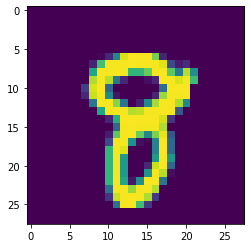

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dataset 603/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset 603/test.csv')
Y = train[['label']]
X = train.drop(train.columns[[0]],axis=1)
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("Size of Dataset: " ,len(X))
cross_validation_size = int(len(X)*0.05)
print("Size of Cross Validation Set: ",cross_validation_size)
random_seed = 2
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=cross_validation_size,random_state=random_seed)
X_test = test
plt.imshow(X_train[0][:,:,0])

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
X_train = np.pad(X_train,((0,0),(2,2),(2,2),(0,0)),'constant')
X_val = np.pad(X_val,((0,0),(2,2),(2,2),(0,0)),'constant')
X_test = np.pad(X_test,((0,0),(2,2),(2,2),(0,0)),'constant')
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train-mean_px)/(std_px)
mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val-mean_px)/(std_px)
mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test-mean_px)/(std_px)
Y_train = to_categorical(Y_train,num_classes = 10)
Y_val = to_categorical(Y_val,num_classes = 10)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = True,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        rotation_range = 10,
        zoom_range = 0.1, 
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        horizontal_flip = False,
        vertical_flip = False)
datagen.fit(X_train)

In [ ]:
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=2)

In [ ]:
history = LeNet5Model.fit(datagen.flow(X_train,Y_train,batch_size=512),epochs=100,callbacks=[variable_learning_rate],validation_data=(X_val,Y_val))  

Epoch 1/100
78/78 [==============================] - 24s 224ms/step - loss: 0.8207 - accuracy: 0.7544 - val_loss: 1.2647 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 2/100
78/78 [==============================] - 17s 211ms/step - loss: 0.2078 - accuracy: 0.9486 - val_loss: 1.6182 - val_accuracy: 0.5729 - lr: 0.0010
Epoch 3/100
78/78 [==============================] - 16s 205ms/step - loss: 0.1427 - accuracy: 0.9661 - val_loss: 1.0157 - val_accuracy: 0.6810 - lr: 0.0010
Epoch 4/100
78/78 [==============================] - 16s 205ms/step - loss: 0.1170 - accuracy: 0.9723 - val_loss: 0.1057 - val_accuracy: 0.9729 - lr: 0.0010
Epoch 5/100
78/78 [==============================] - 17s 214ms/step - loss: 0.0976 - accuracy: 0.9768 - val_loss: 0.0858 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 6/100
78/78 [==============================] - 16s 203ms/step - loss: 0.0875 - accuracy: 0.9791 - val_loss: 0.1066 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 7/100
78/78 [==============================] - 15s 1

**run more epochs (15-20) for higher accuracy** *(upto 99.63%)*

<Figure size 432x288 with 0 Axes>

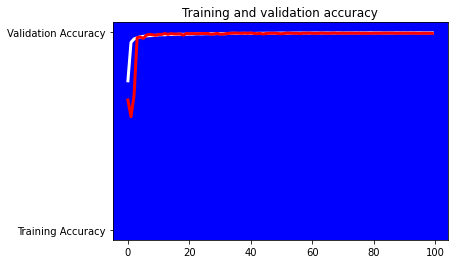

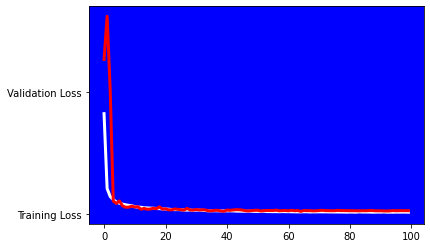

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))
ax = plt.axes()
ax.set_facecolor("blue")
plt.plot(epochs, acc,"white","Training Accuracy",linewidth=3.0)
plt.plot(epochs, val_acc,"red","Validation Accuracy",linewidth=3.0)
plt.title("Training and validation accuracy")
plt.figure()
ax = plt.axes()
ax.set_facecolor("blue")
plt.plot(epochs,loss,"white","Training Loss",linewidth=3.0)
plt.plot(epochs,val_loss,"red","Validation Loss",linewidth=3.0)
plt.figure()

#**THIS TEST DATASET IS UNLABELLED , NEED TO CHECK MANUALLY**

875/875 [==============================] - 2s 3ms/step
2


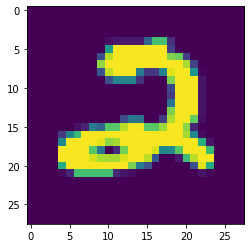

0


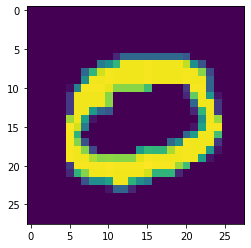

9


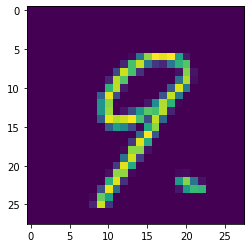

0


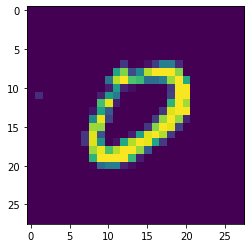

3


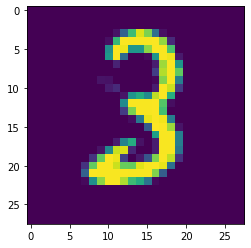

7


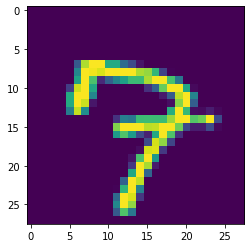

0


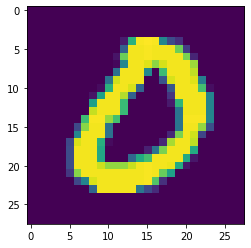

3


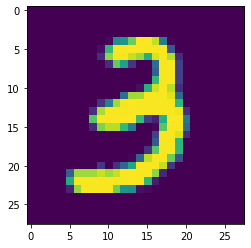

0


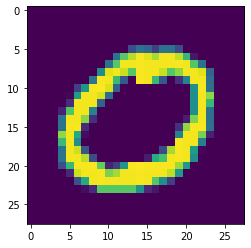

3


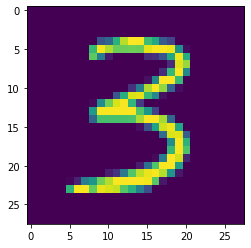

5


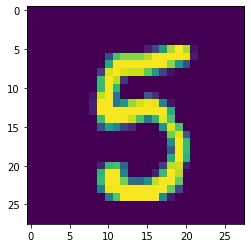

7


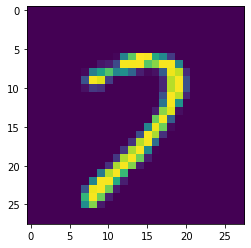

4


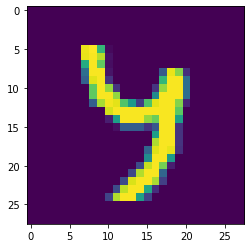

0


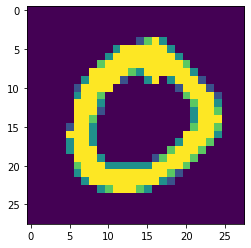

4


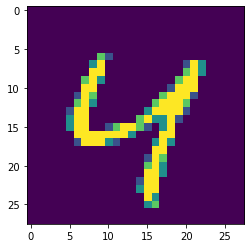

3


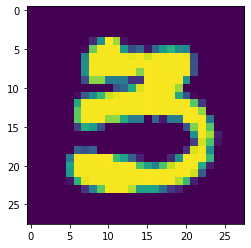

3


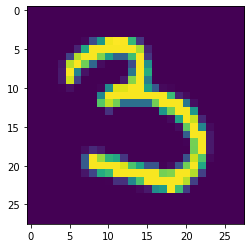

1


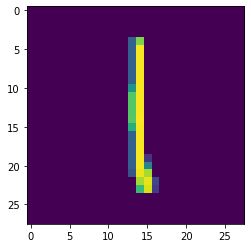

9


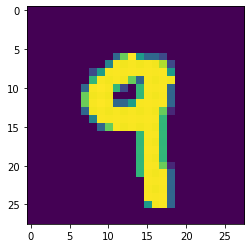

0


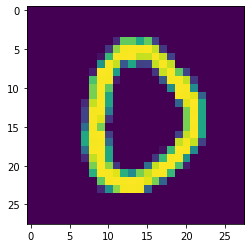

9


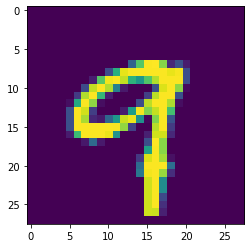

1


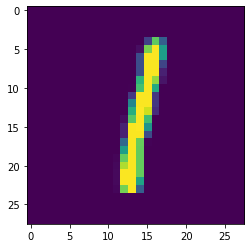

1


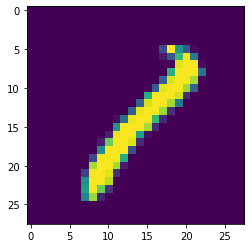

5


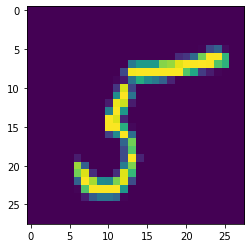

7


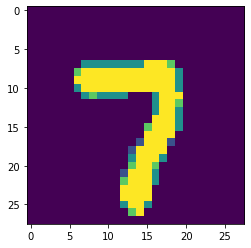

In [ ]:
results = LeNet5Model.predict(X_test)
results = np.argmax(results,axis=1)
results = pd.Series(results,name="Label")
test = pd.read_csv('/content/drive/MyDrive/dataset 603/test.csv')
test = test.values.reshape(-1,28,28,1)
def manual_test(i):  
  plt.imshow(test[i][:,:,0])
  print(results[i])
  plt.show()
for i in range(25): 
  manual_test(i)

## **25/25 are correct** in first 25 samples , now taking random 100 samples for verification

875/875 [==============================] - 2s 2ms/step
5


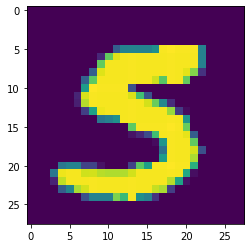

2


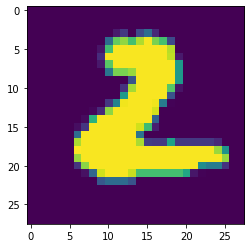

6


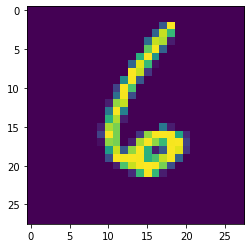

9


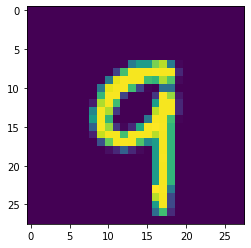

3


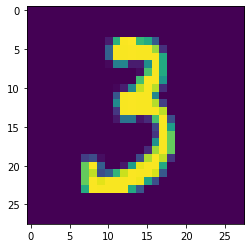

1


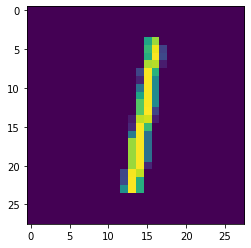

7


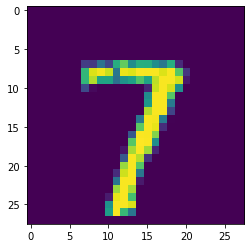

9


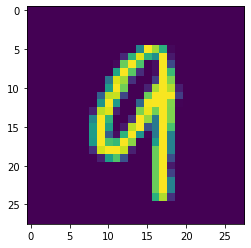

7


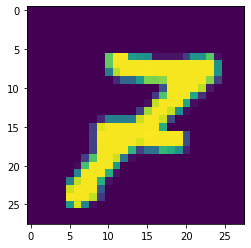

4


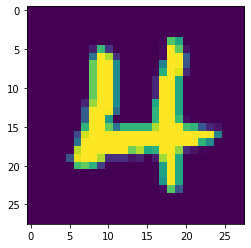

7


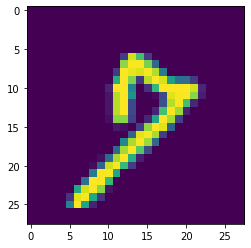

2


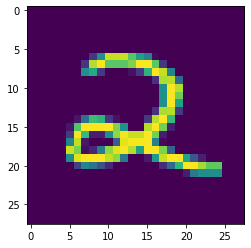

4


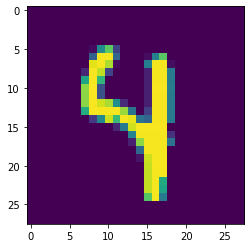

6


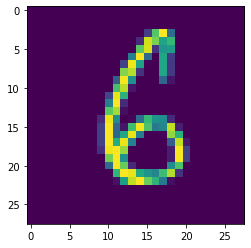

8


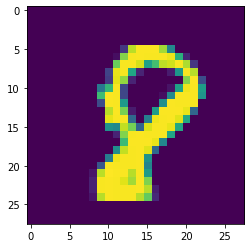

6


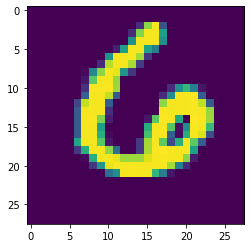

3


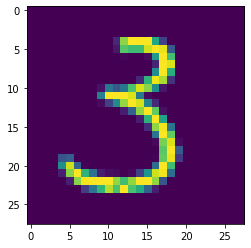

7


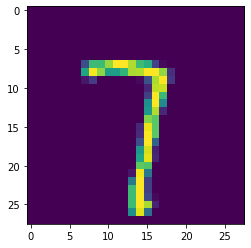

3


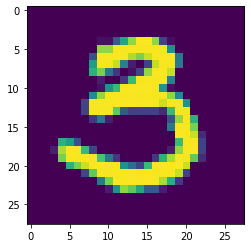

9


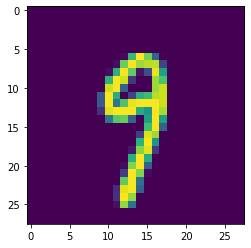

5


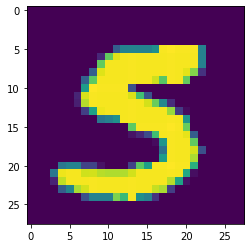

8


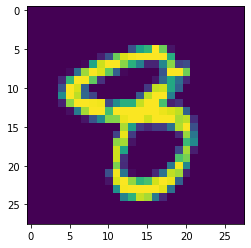

6


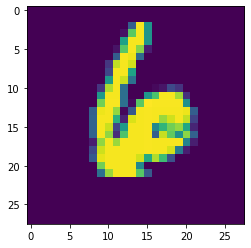

2


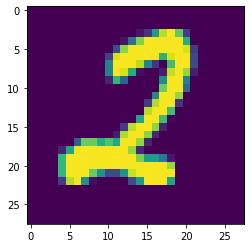

7


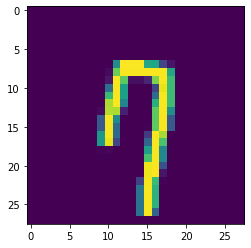

9


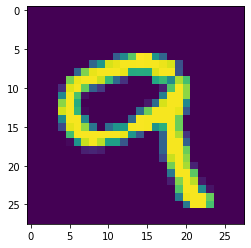

3


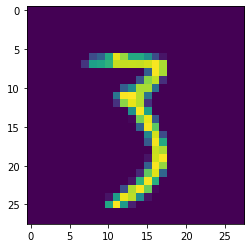

6


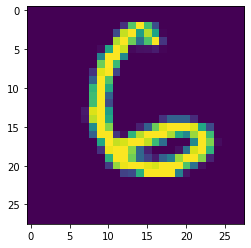

6


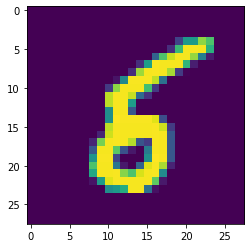

2


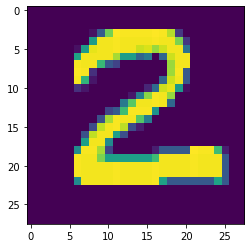

8


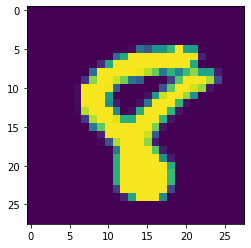

4


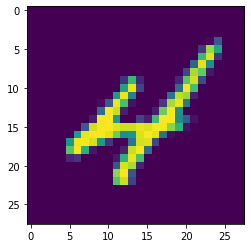

5


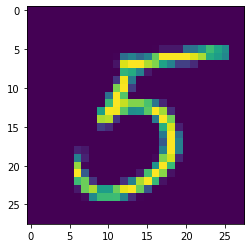

4


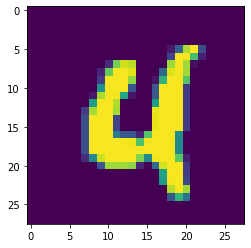

1


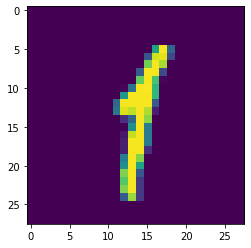

0


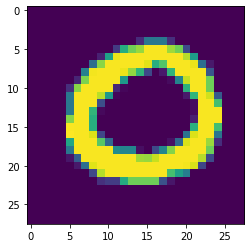

7


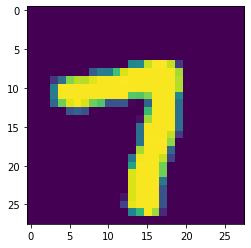

1


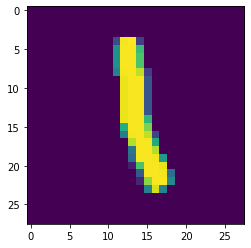

3


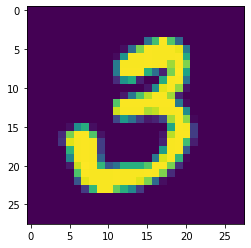

1


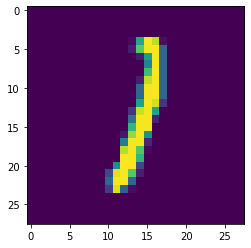

7


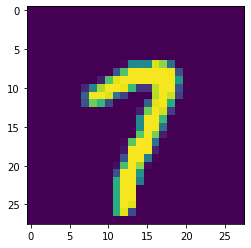

6


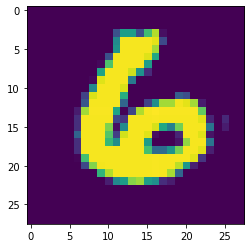

4


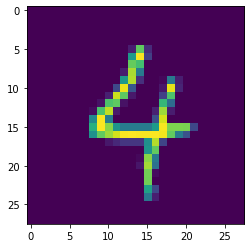

4


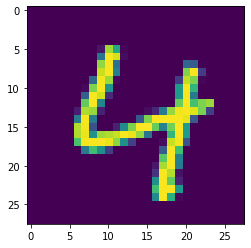

9


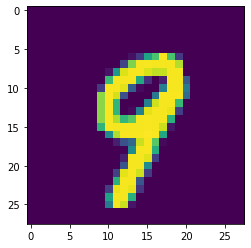

0


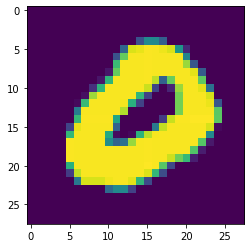

8


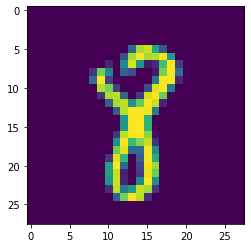

2


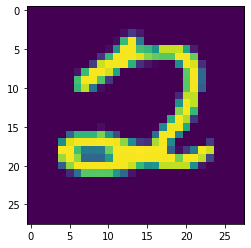

0


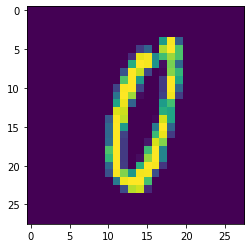

8


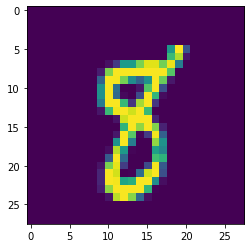

6


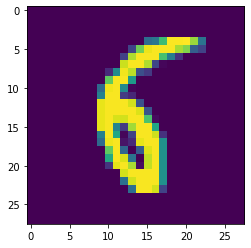

1


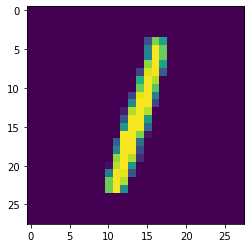

7


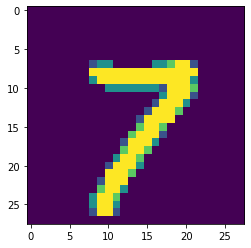

1


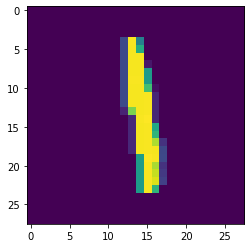

8


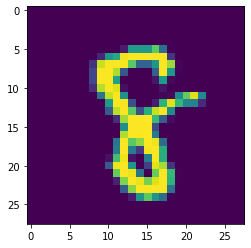

9


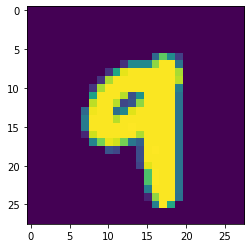

9


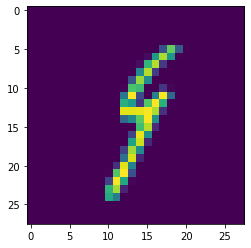

9


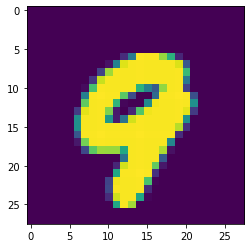

4


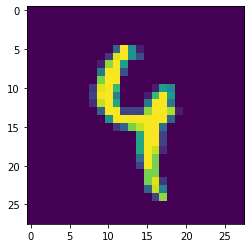

7


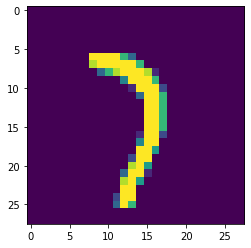

4


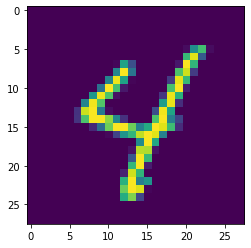

2


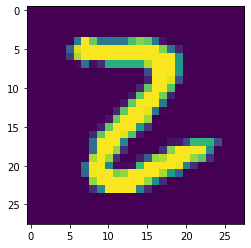

0


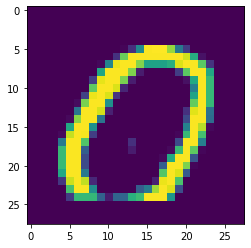

3


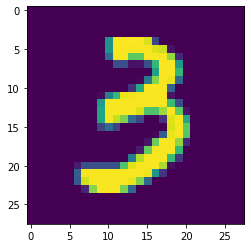

6


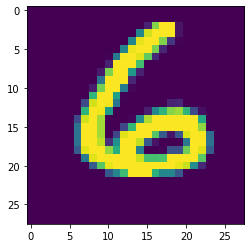

0


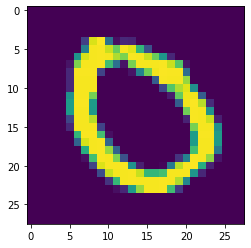

3


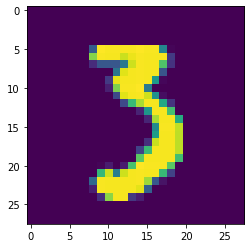

5


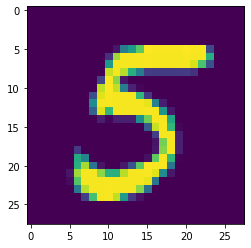

8


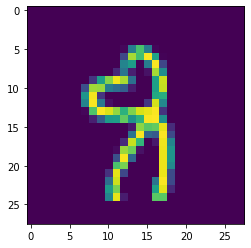

5


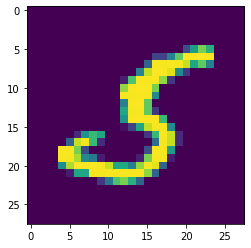

7


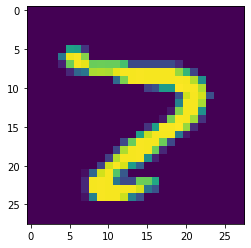

4


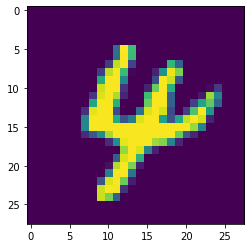

2


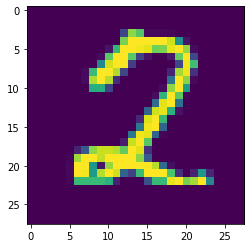

1


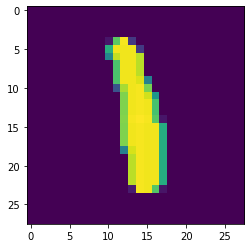

9


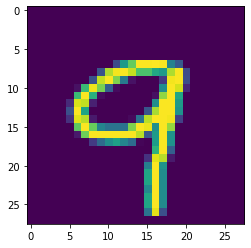

1


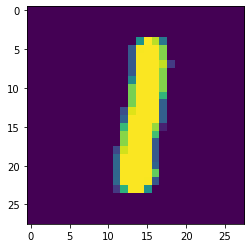

9


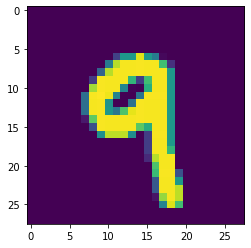

8


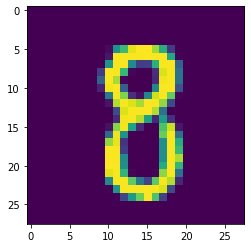

7


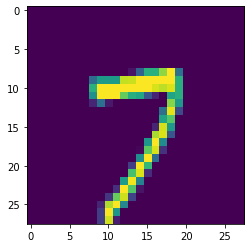

0


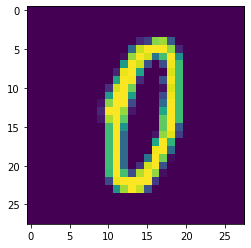

2


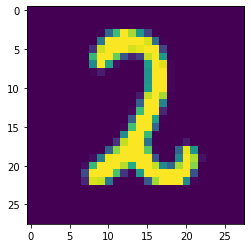

7


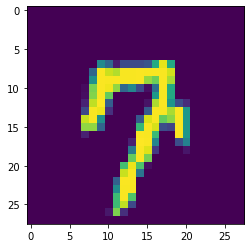

8


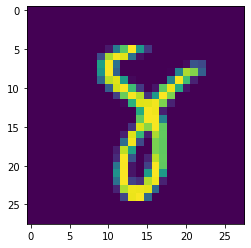

2


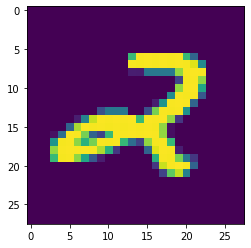

1


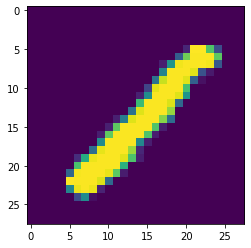

7


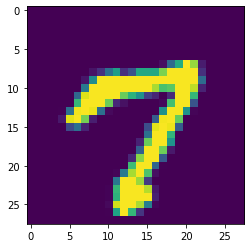

7


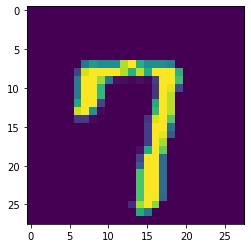

4


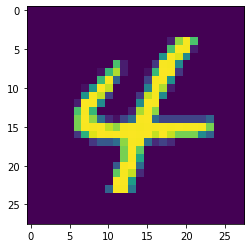

1


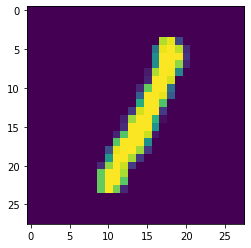

0


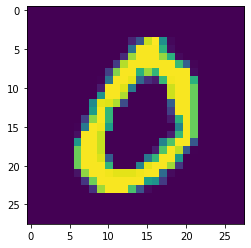

4


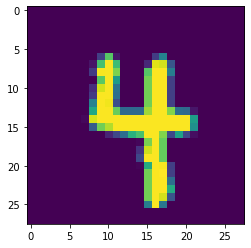

9


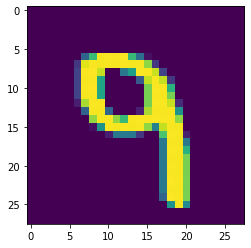

4


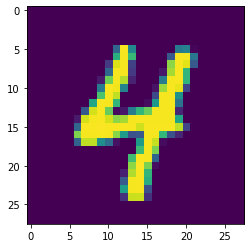

4


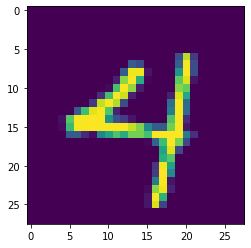

0


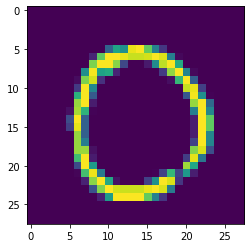

2


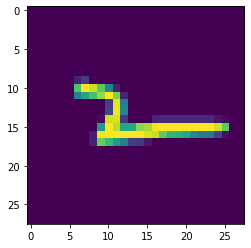

8


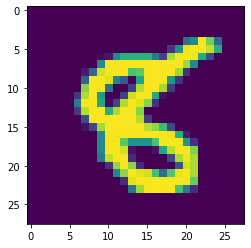

2


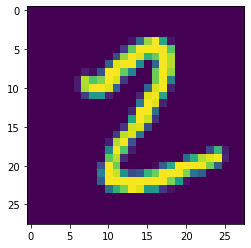

0


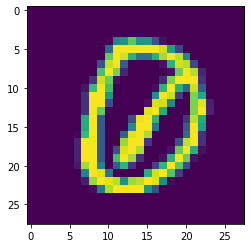

3


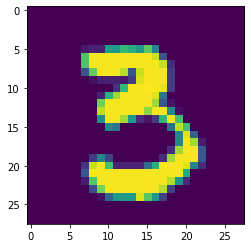

In [ ]:
import random
results = LeNet5Model.predict(X_test)
results = np.argmax(results,axis=1)
results = pd.Series(results,name="Label")
test = pd.read_csv('/content/drive/MyDrive/dataset 603/test.csv')
test = test.values.reshape(-1,28,28,1)
def manual_test(i):  
  plt.imshow(test[i][:,:,0])
  print(results[i])
  plt.show()
for i in range(100): 
  manual_test(random.randint(0,28000))

##**100/100 correct again**